# GRAPE calculation of control fields for cnot implementation

[This is an updated implementation based on the deprecated notebook of GRAPE CNOT implementation by Robert Johansson](https://nbviewer.org/github/qutip/qutip-notebooks/blob/master/examples/control-grape-cnot.ipynb)

In [50]:
# pip install qutip_qtrl

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt
# the library for quantum control
import qutip_qtrl.pulseoptim as cpo

In [52]:
# total duration
T = 2 * np.pi
# number of time steps
times = np.linspace(0, T, 500)

In [53]:
U_0 = qt.operators.identity(4)
U_target = qt.core.gates.cnot()

### Starting Point

In [54]:
U_0

Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=Dia, isherm=True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

### Target Operator

In [55]:
U_target

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

In [56]:
# Drift Hamiltonian
g = 0
H_drift = g * (
    qt.tensor(qt.sigmax(), qt.sigmax()) + qt.tensor(qt.sigmay(), qt.sigmay())
)

H_drift

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

In [57]:
H_ctrl = [
    qt.tensor(qt.sigmax(), qt.identity(2)),
    qt.tensor(qt.sigmay(), qt.identity(2)),
    qt.tensor(qt.sigmaz(), qt.identity(2)),
    qt.tensor(qt.identity(2), qt.sigmax()),
    qt.tensor(qt.identity(2), qt.sigmay()),
    qt.tensor(qt.identity(2), qt.sigmaz()),
    qt.tensor(qt.sigmax(), qt.sigmax()),
    qt.tensor(qt.sigmay(), qt.sigmay()),
    qt.tensor(qt.sigmaz(), qt.sigmaz()),
]

In [58]:
H_labels = [
    r"$u_{1x}$",
    r"$u_{1y}$",
    r"$u_{1z}$",
    r"$u_{2x}$",
    r"$u_{2y}$",
    r"$u_{2z}$",
    r"$u_{xx}$",
    r"$u_{yy}$",
    r"$u_{zz}$",
]

In [59]:
H_labels

['$u_{1x}$',
 '$u_{1y}$',
 '$u_{1z}$',
 '$u_{2x}$',
 '$u_{2y}$',
 '$u_{2z}$',
 '$u_{xx}$',
 '$u_{yy}$',
 '$u_{zz}$']

## GRAPE

In [60]:
result = cpo.optimize_pulse_unitary(
    H_drift,
    H_ctrl,
    U_0,
    U_target,
    num_tslots=500,
    evo_time=(2 * np.pi),
    # this attribute is crucial for convergence!!
    amp_lbound=-(2 * np.pi * 0.05),
    amp_ubound=(2 * np.pi * 0.05),
    fid_err_targ=1e-9,
    max_iter=500,
    max_wall_time=60,
    alg="GRAPE",
    optim_method="FMIN_L_BFGS_B",
    method_params={
        "disp": True,
        "maxiter": 1000,
    },
)

In [61]:
for attr in dir(result):
    if not attr.startswith("_"):
        print(f"{attr}: {getattr(result, attr)}")

print(np.shape(result.final_amps))

evo_full_final: Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 7.07112631e-01-7.07100930e-01j -4.32652399e-06-7.16028308e-06j
   1.35326459e-05+1.45558981e-05j -3.72526006e-05-1.14430454e-05j]
 [-7.16089778e-06-4.32557720e-06j  7.07105332e-01-7.07108230e-01j
   1.38548778e-05+2.20911241e-05j -1.84338021e-05+3.58764468e-06j]
 [-1.14431440e-05-3.72529562e-05j  3.58716734e-06-1.84343580e-05j
  -1.91706866e-05-7.33967393e-06j  7.07099532e-01-7.07114029e-01j]
 [ 1.45550059e-05+1.35325206e-05j  2.20909202e-05+1.38546089e-05j
   7.07109627e-01-7.07103934e-01j -7.33979148e-06-1.91718368e-05j]]
evo_full_initial: Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 0.97932487-0.02020818j -0.03701376-0.09832588j  0.03823834+0.04298663j
   0.02510297-0.15980067j]
 [ 0.03002445-0.11238518j  0.98602089-0.07729804j  0.01517454+0.06518076j
   0.04173873+0.04511098j]
 [-0.04094433+0.0576644j   0.011638

## Plot control fields for cnot gate in the presense of single-qubit tunnelling

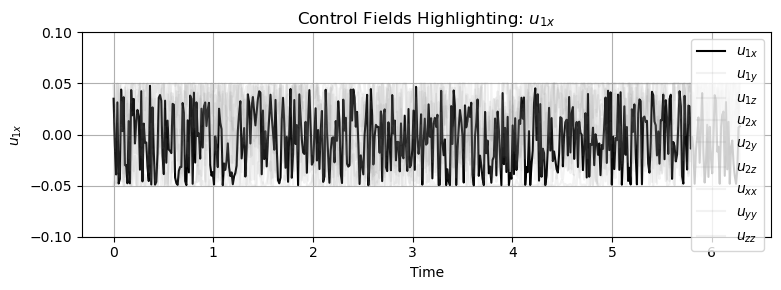

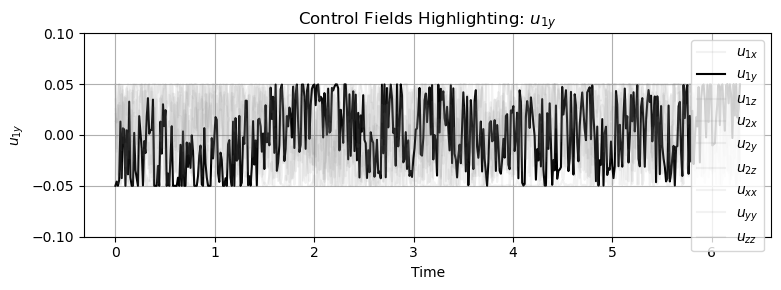

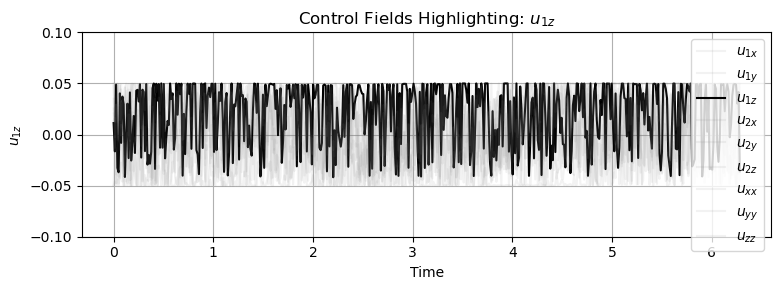

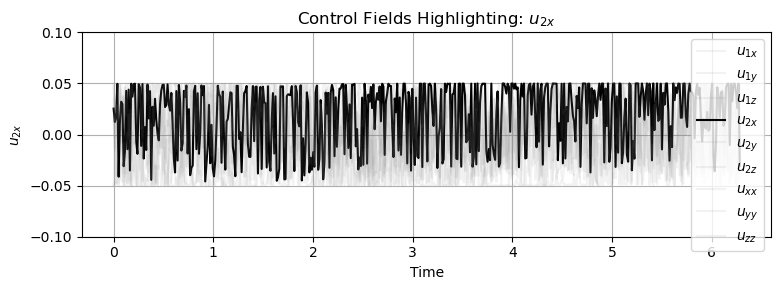

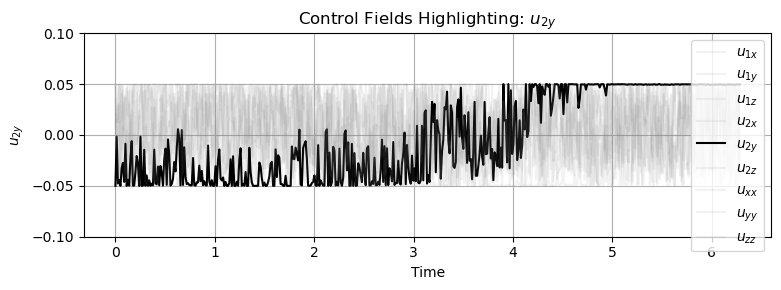

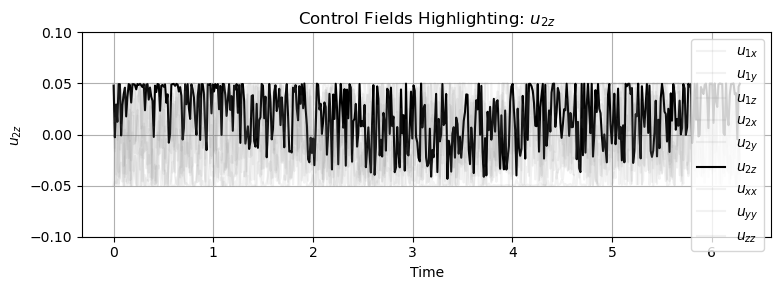

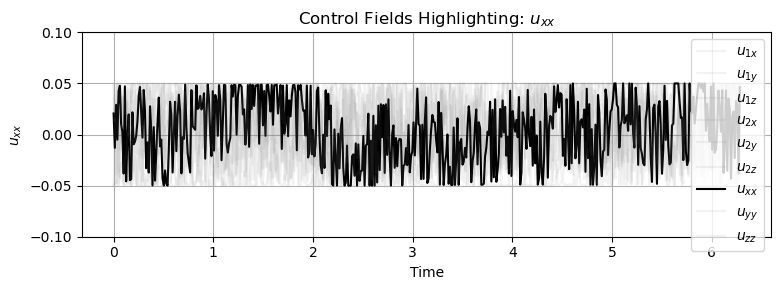

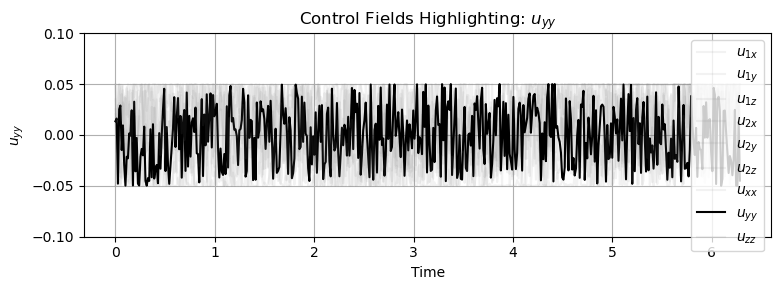

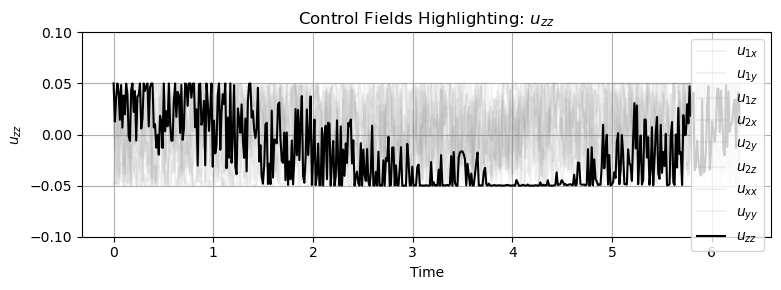

In [62]:
def plot_control_amplitudes(times, final_amps, labels):
    num_controls = final_amps.shape[1]

    y_max = 0.1  # Fixed y-axis scale
    y_min = -0.1

    for i in range(num_controls):
        fig, ax = plt.subplots(figsize=(8, 3))

        for j in range(num_controls):
            # Highlight the current control
            color = "black" if i == j else "gray"
            alpha = 1.0 if i == j else 0.1
            ax.plot(
                times,
                final_amps[:, j],
                label=labels[j],
                color=color,
                alpha=alpha
                )
        ax.set_title(f"Control Fields Highlighting: {labels[i]}")
        ax.set_xlabel("Time")
        ax.set_ylabel(labels[i])
        ax.set_ylim(y_min, y_max)  # Set fixed y-axis limits
        ax.grid(True)
        ax.legend()
        plt.tight_layout()
        plt.show()


plot_control_amplitudes(times, result.final_amps / (2 * np.pi), H_labels)

## Fidelity/overlap

In [63]:
U_target

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

In [64]:
U_f = result.evo_full_final
U_f.dims = [[2, 2], [2, 2]]

In [ ]:
U_f

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 7.07112631e-01-7.07100930e-01j -4.32652399e-06-7.16028308e-06j
   1.35326459e-05+1.45558981e-05j -3.72526006e-05-1.14430454e-05j]
 [-7.16089778e-06-4.32557720e-06j  7.07105332e-01-7.07108230e-01j
   1.38548778e-05+2.20911241e-05j -1.84338021e-05+3.58764468e-06j]
 [-1.14431440e-05-3.72529562e-05j  3.58716734e-06-1.84343580e-05j
  -1.91706866e-05-7.33967393e-06j  7.07099532e-01-7.07114029e-01j]
 [ 1.45550059e-05+1.35325206e-05j  2.20909202e-05+1.38546089e-05j
   7.07109627e-01-7.07103934e-01j -7.33979148e-06-1.91718368e-05j]]

In [66]:
print(f"Fidelity: {qt.process_fidelity(U_f, U_target)}")

Fidelity: 0.9999999982326335


## Proceess tomography

Quantum Process Tomography (QPT) is a technique used to characterize an unknown quantum operation by reconstructing its process matrix (also called the χ (chi) matrix). This matrix describes how an input quantum state is transformed by the operation.

Defines the basis operators 
{
𝐼
,
𝑋
,
𝑌
,
𝑍
}
for the two-qubit system.

These operators form a complete basis to describe any quantum operation in the Pauli basis.

### Ideal cnot gate

In [67]:
op_basis = [[qt.qeye(2), qt.sigmax(), qt.sigmay(), qt.sigmaz()]] * 2
op_label = [["i", "x", "y", "z"]] * 2

U_target is the ideal CNOT gate.

qt.to_super(U_target) converts it into superoperator form, which is necessary for QPT.

qt.qpt(U_i_s, op_basis) computes the χ matrix for the ideal gate.

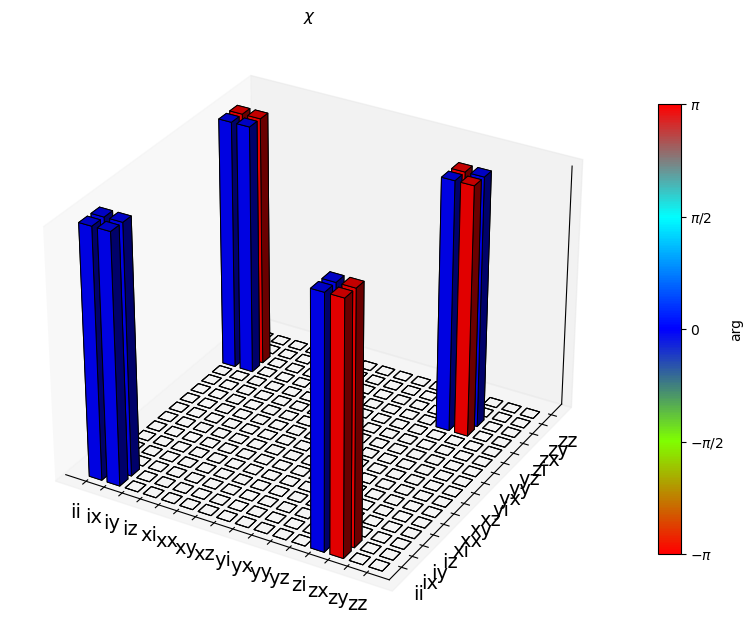

In [74]:
fig = plt.figure(figsize=(12, 6))

U_i_s = qt.to_super(U_target)

chi = qt.qpt(U_i_s, op_basis)

fig = qt.qpt_plot_combined(chi, op_label, fig=fig, threshold=0.001)

In [72]:
op_basis = [[qt.qeye(2), qt.sigmax(), qt.sigmay(), qt.sigmaz()]] * 2
op_label = [["i", "x", "y", "z"]] * 2

op_label

[['i', 'x', 'y', 'z'], ['i', 'x', 'y', 'z']]

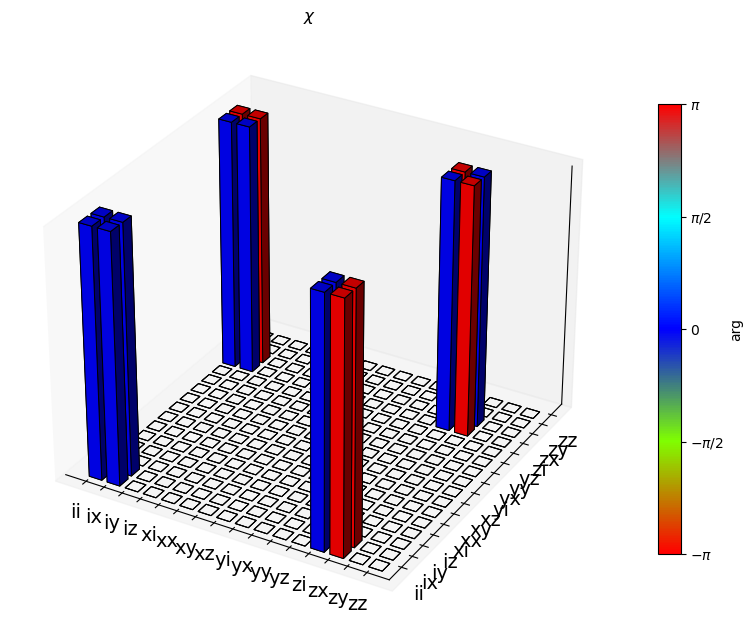

In [70]:
fig = plt.figure(figsize=(12, 6))

U_f_s = qt.to_super(U_f)

chi = qt.qpt(U_f_s, op_basis)

fig = qt.qpt_plot_combined(chi, op_label, fig=fig, threshold=0.01)